### In this notebook, we use Gudhi to compute persistence diagrams on the reddit 5K dataset

In [1]:
import numpy              as np
import pickle
import gudhi              as gd

# Load data
The graph file is available at Pinar Yanardag's webpage: http://www.mit.edu/~pinary/ (item "Data" in section "Deep Graph Kernel")

In [2]:
graph_dataset = pickle.load(open("reddit_5K/reddit_multi_5K.graph"))

# Persistence diagram computation

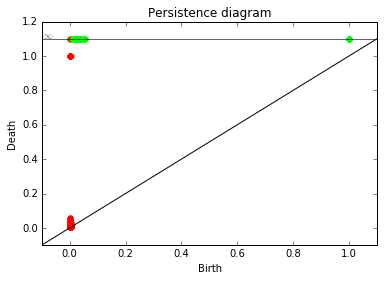

In [3]:
# Choose graph to compute persistence diagram
# There 5000 graphs available so specify idx with 0 <= idx <= 4999

idx = 0
graph = graph_dataset['graph'][idx]

# Create a simplex tree to store the filtration
st = gd.SimplexTree()

# Compute maximal degree of the graph
max_degree = 0
for node, info in graph.iteritems():
    degree = len(info['neighbors'])
    max_degree = max(degree,max_degree)

# Compute degree for each node and use it as filtration value
for node, info in graph.iteritems():
    num_neighb = len(info['neighbors'])
    degree = num_neighb*1.0/max_degree
    st.insert([node],filtration=degree)
    
    # Derive edge filtration value by taking maximum
    for i in range(num_neighb):
        degree_neighbor = len(graph[info['neighbors'][i]]['neighbors'])*1.0/max_degree
        st.insert([node, info['neighbors'][i]], filtration=max(degree,degree_neighbor))

# Compute persistence
diag = st.persistence()

# Visualize persistence diagram
plot = gd.plot_persistence_diagram(diag)
plot.show()